In [ ]:
# Importar librerías
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Cargar datos
df = pd.read_csv("/Users/Usuario/Documents/CUARTO AÑO/DATA SCIENCE/Proyecto final/synthetic_fraud_dataset 2.csv")

# Feature Engineering
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Weekend_Night_Flag'] = ((df['Is_Weekend'] == 1) & (df['Hour'] >= 18)).astype(int)
df['High_Amount_Flag'] = (df['Transaction_Amount'] > df['Transaction_Amount'].quantile(0.75)).astype(int)
df['Risk_x_Fails'] = df['Risk_Score'] * df['Failed_Transaction_Count_7d']

# Eliminar columnas irrelevantes y codificar
df.drop(columns=['Transaction_ID', 'User_ID', 'Timestamp'], inplace=True)
df = pd.get_dummies(df, columns=[
    'Transaction_Type', 'Device_Type', 'Location',
    'Merchant_Category', 'Card_Type', 'Authentication_Method'
], drop_first=True)

df.drop(columns=['Risk_Score'], inplace=True)

# Separar variables predictoras y objetivo
X = df.drop(columns=['Fraud_Label'])
y = df['Fraud_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Entrenar modelo directamente
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1-score:", round(f1_score(y_test, y_pred), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 4))


Accuracy: 0.7979
Precision: 0.7846
Recall: 0.5114
F1-score: 0.6192
ROC AUC: 0.8031


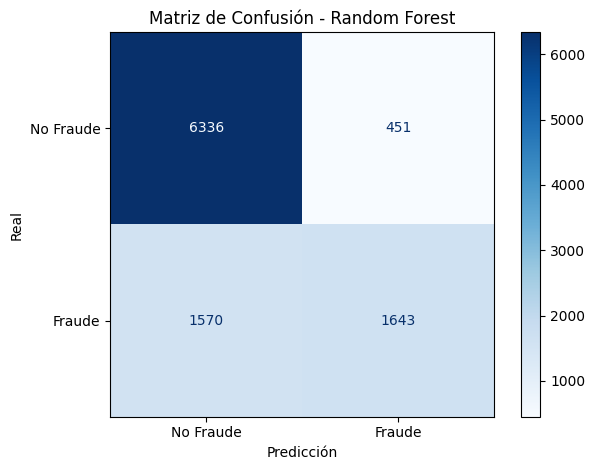

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualización
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Fraude", "Fraude"])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()